In [121]:
##################
## Load libraries
##################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
import pandas_profiling
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, hierarchical
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
import mpl_toolkits.mplot3d.axes3d as p3
%matplotlib inline
warnings.filterwarnings('ignore')

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
import plotly.plotly as py

# 1. EDA

### 1.1 First look

In [77]:
school_explorer = pd.read_csv('2016 School Explorer.csv')
shsat_reg = pd.read_csv('D5 SHSAT Registrations and Testers.csv')
ms_direct = pd.read_csv('ms_directory_2018.csv')
offer_by_ms = pd.read_csv('2017-2018_SHSAT_Admissions_Test_Offers_By_Sending_School.csv')
demo_snapshot = pd.read_csv('2013_-_2018_Demographic_Snapshot_School.csv')
math = pd.read_csv('math.csv')
ela = pd.read_csv('ela.csv')
class_size = pd.read_csv('avg_class_size.csv')
ptr = pd.read_csv('ptr.csv')
district_demo = pd.read_csv('school-district-breakdowns.csv')
hs_direct = pd.read_csv('2017-doe-high-school-directory.csv')

In [78]:
school_explorer.head()

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,310100010034,01M034,1,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",...,48,1,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,310100010063,01M063,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0


In [79]:
shsat_reg.head()

,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
0,05M046,P.S. 046 Arthur Tappan,2013,8,91,31,14
1,05M046,P.S. 046 Arthur Tappan,2014,8,95,26,7
2,05M046,P.S. 046 Arthur Tappan,2015,8,73,21,10
3,05M046,P.S. 046 Arthur Tappan,2016,8,56,20,8
4,05M123,P.S. 123 Mahalia Jackson,2013,8,62,31,14


In [80]:
school_explorer.info(verbose=2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 161 columns):
Adjusted Grade                                        object
New?                                                  object
Other Location Code in LCGMS                          object
School Name                                           object
SED Code                                              int64
Location Code                                         object
District                                              int64
Latitude                                              float64
Longitude                                             float64
Address (Full)                                        object
City                                                  object
Zip                                                   int64
Grades                                                object
Grade Low                                             object
Grade High                             

In [81]:
shsat_reg.info(verbose=2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
DBN                                                140 non-null object
School name                                        140 non-null object
Year of SHST                                       140 non-null int64
Grade level                                        140 non-null int64
Enrollment on 10/31                                140 non-null int64
Number of students who registered for the SHSAT    140 non-null int64
Number of students who took the SHSAT              140 non-null int64
dtypes: int64(5), object(2)
memory usage: 7.7+ KB


In [82]:
shsat_reg.describe()

,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
count,140.000000,140.000000,140.000000,140.000000,140.000000
mean,2014.542857,8.392857,91.971429,19.071429,9.664286
std,1.121224,0.490139,47.494027,23.280165,10.149679
min,2013.000000,8.000000,17.000000,0.000000,0.000000
25%,2014.000000,8.000000,62.750000,2.000000,1.000000
50%,2015.000000,8.000000,86.000000,12.000000,6.000000
75%,2016.000000,9.000000,113.000000,26.000000,14.000000
max,2016.000000,9.000000,344.000000,118.000000,45.000000


In [83]:
print("school_explorer dataset has {} samples with {} features each.".format(*school_explorer.shape))
print("shsat_reg dataset has {} samples with {} features each.".format(*shsat_reg.shape))

school_explorer dataset has 1272 samples with 161 features each.
shsat_reg dataset has 140 samples with 7 features each.


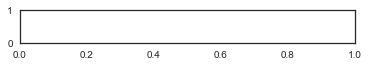

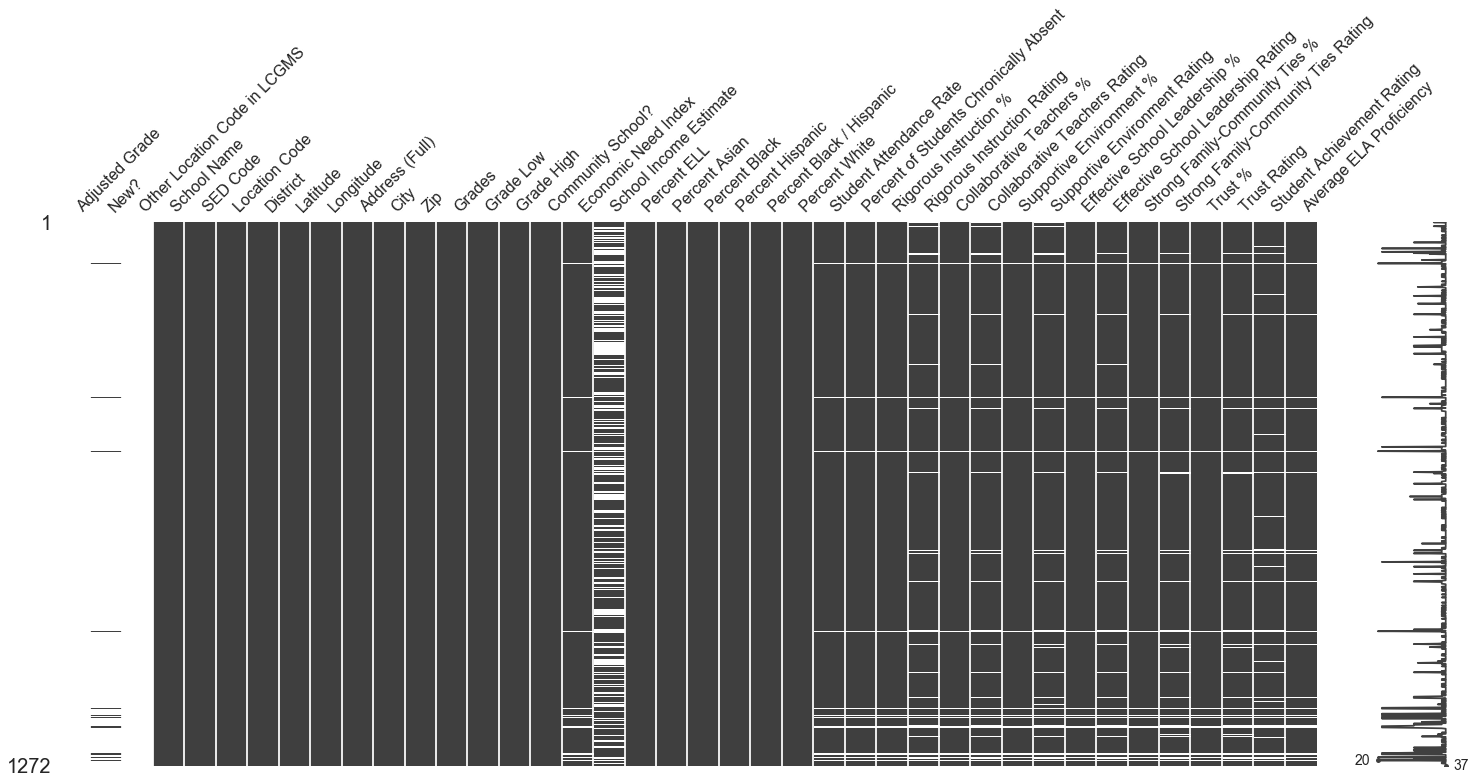

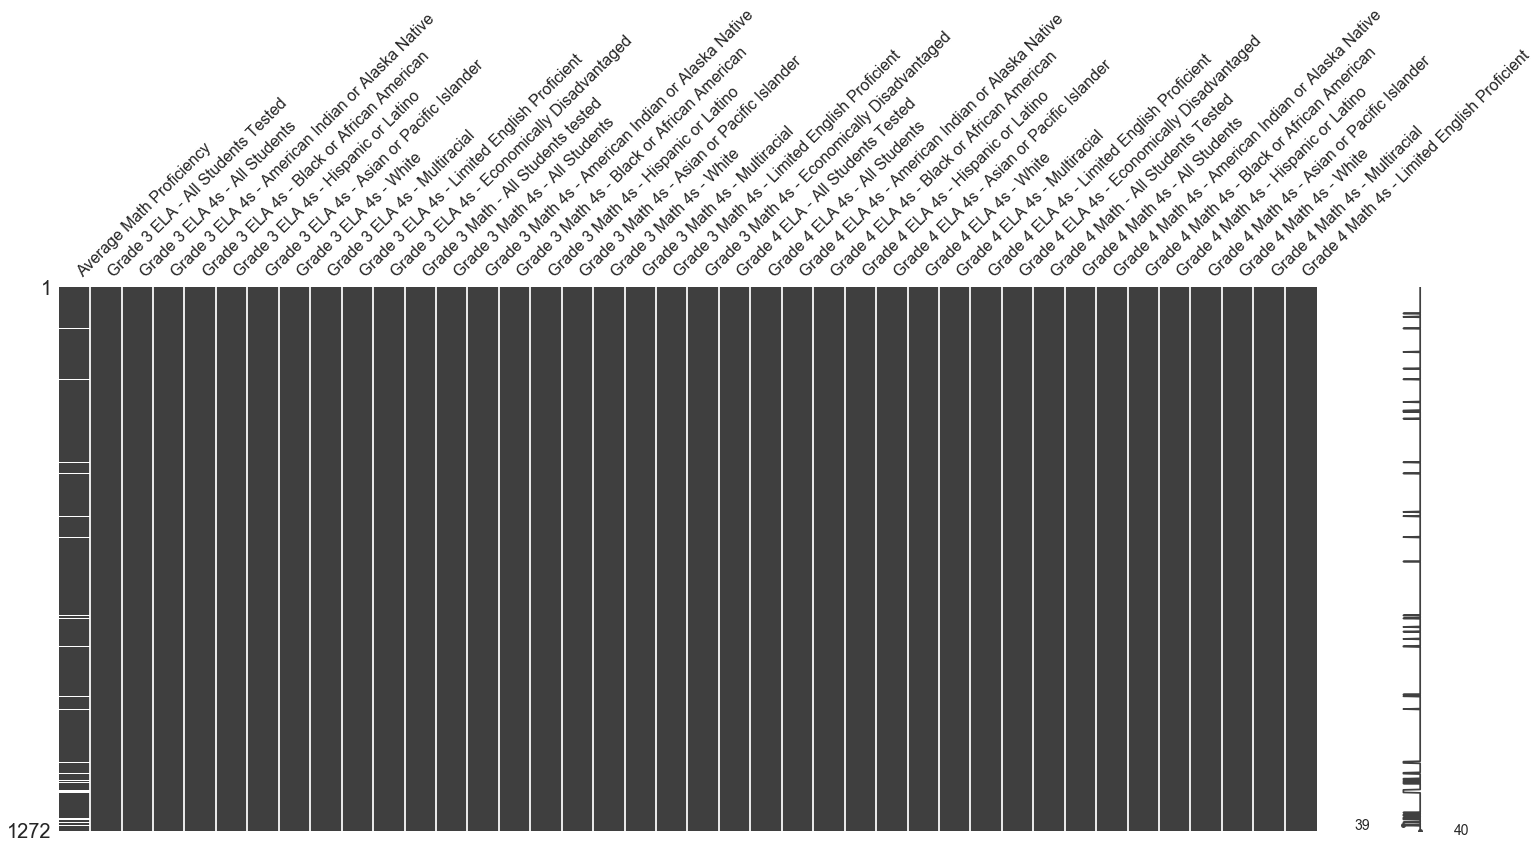

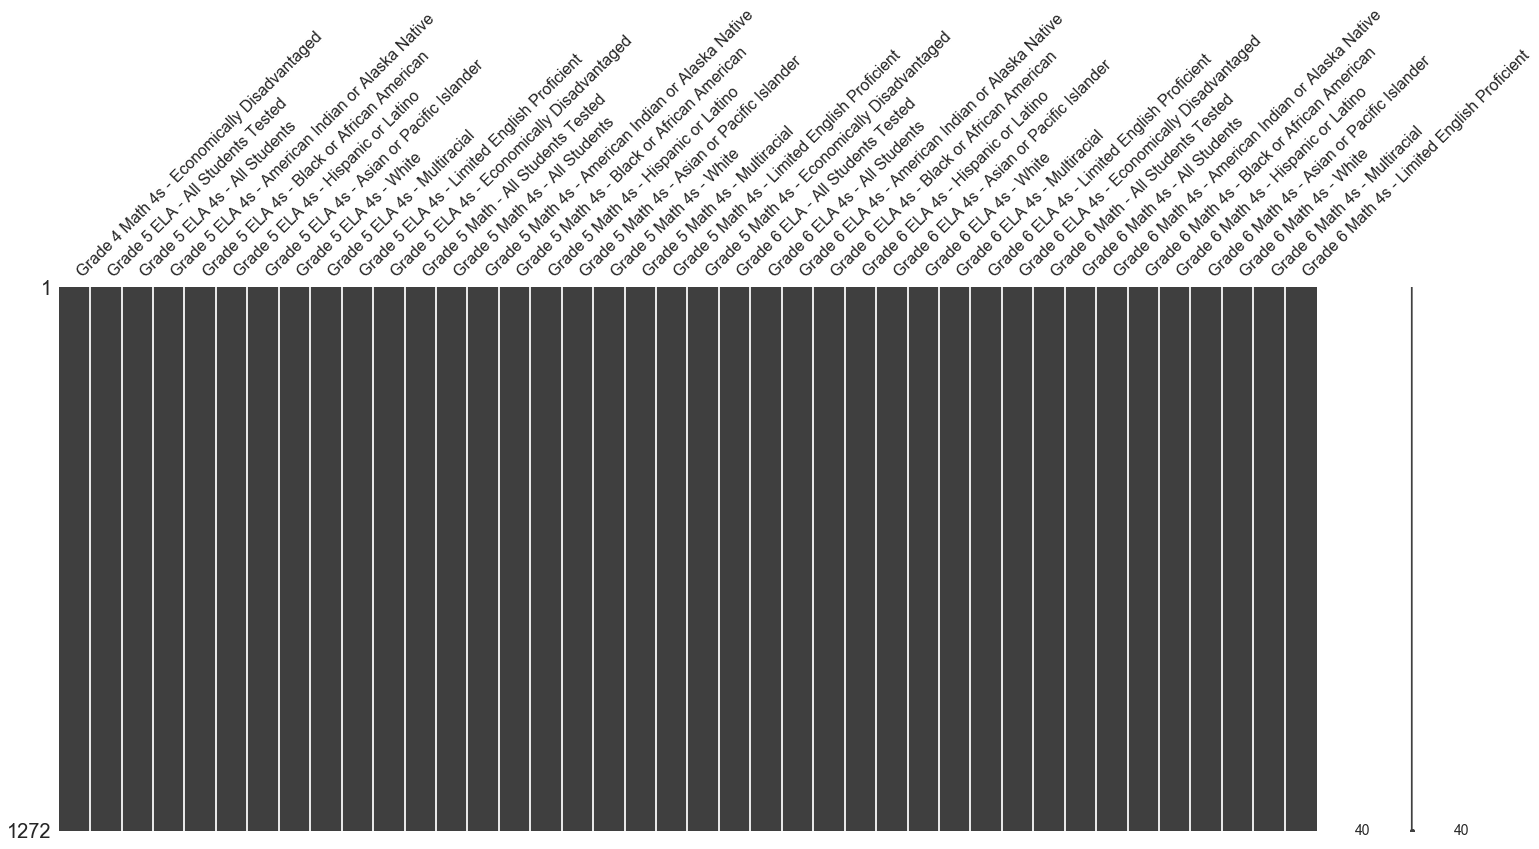

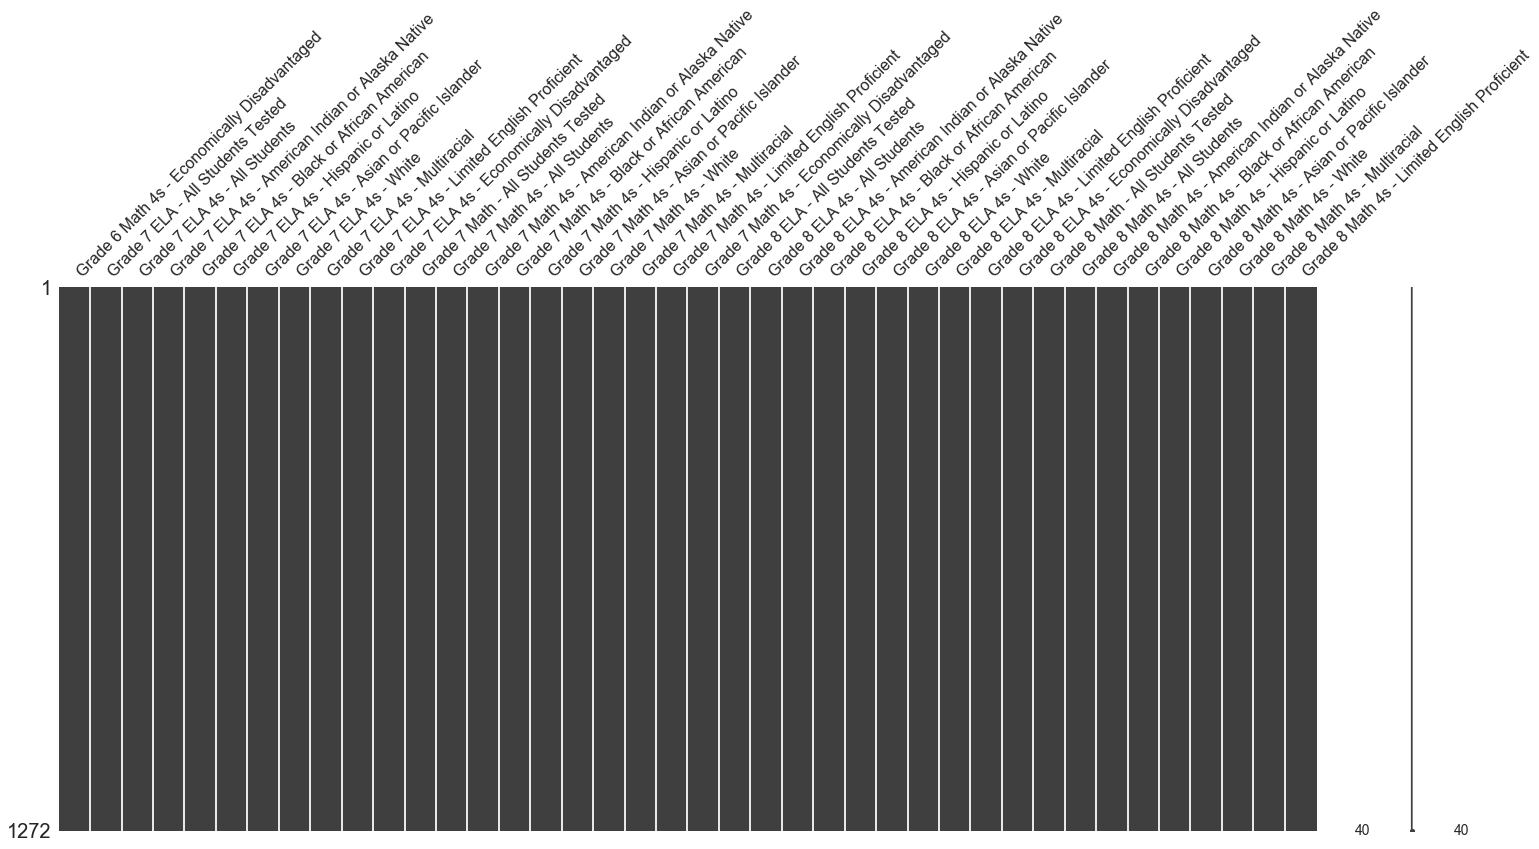

In [84]:
start_col = 0
stop_col = 40
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, 5):
    ax = fig.add_subplot(5, 1, i)
    msno.matrix(school_explorer.iloc[:,start_col:stop_col])
    plt.show()
    
    
    start_col = stop_col
    stop_col += round(len(school_explorer.columns)/4)
    
    

In [85]:
#################
## UDFs
#################

def describe_categorical_values(df, non_interesting_columns=[], num_categories=5):
    '''get a glimps for all the categorical columns and it's most common values (including % of total column)'''
    values_df = pd.DataFrame()
    for i, column in enumerate(df.columns):
        if column in non_interesting_columns:
            continue
        top_values0 = ["{}: {}%".format(x,int(round(100*y/len(df))))
                       for x, y in zip(df[column].value_counts(dropna=False).head(num_categories).index,
                                       df[column].value_counts(dropna=False).head(num_categories).values)]
        if len(top_values0) < num_categories:
            top_values = [None]*num_categories
            top_values[:len(top_values0)] = top_values0
        else:
            top_values = top_values0
        values_df[column] = top_values
    return values_df.transpose()


def remove_infrequent_values(df, categorical_columns, frequency_threshold=15):
    '''Remove infrequent categorical values'''
    infrequent_cols_to_remove = []
    for cat_col in categorical_columns:
        col_count = df[cat_col].value_counts()
        infrequent_values = col_count[col_count<frequency_threshold].index.values
        if not col_count[col_count<frequency_threshold].empty:
            print("removing columns: \n{} \n".format(col_count[col_count<frequency_threshold]))
        infrequent_cols_to_remove += ["{}_{}".format(cat_col, x) for x in infrequent_values]
    return df


def p2f(x):
    return float(x.strip('%'))/100

In [86]:
# categorical_cols
num_cols = school_explorer.describe().columns.tolist()
cat_cols = list(set(school_explorer.columns) - set(num_cols))

In [87]:
len(cat_cols)

33

### 1.2 Clean & Convert

In [88]:
for col in school_explorer.columns:
        
        if '%' in col:
            school_explorer[col] = school_explorer[col].astype(str).apply(p2f)

        elif 'Percent'in col or 'Rate' in col:
            school_explorer[col] = school_explorer[col].astype(str).apply(p2f)

        elif 'Economic Need Index' in col:
            school_explorer[col] = school_explorer[col].fillna(0)

        elif 'District' in col:
            school_explorer[col] = school_explorer[col].astype(str)

        elif 'Income' in col:
            school_explorer[col] = school_explorer[col].str.replace(',', '')
            school_explorer[col] = school_explorer[col].str.replace('$', '')
            school_explorer[col] = school_explorer[col].str.replace(' ', '')
            school_explorer[col] = school_explorer[col].astype(float)
            school_explorer[col] = school_explorer[col].fillna(0)

        elif 'Adjusted Grade' in col or 'Other Location Code in LCGMS' in col:
            school_explorer.drop(col, inplace=True, axis=1)
            
        elif 'New?' in col:
            school_explorer[col] = school_explorer["New?"].apply(lambda x:"Yes" if type(x)!=float else "No")

        elif 'Grade High' in col:
            school_explorer[col] = school_explorer[school_explorer[col] != '0K'] 
        
        
# categorical_cols
num_cols = school_explorer.describe().columns.tolist()
cat_cols = list(set(school_explorer.columns) - set(num_cols))
len(cat_cols)

17

In [89]:
describe_categorical_values(school_explorer, num_cols, 7)

,0,1,2,3,4,5,6
New?,No: 98%,Yes: 2%,None,None,None,None,None
School Name,P.S. 253: 0%,P.S. 212: 0%,P.S. 199 FREDERICK WACHTEL: 0%,NEIGHBORHOOD SCHOOL: 0%,P.S. 009 SARAH ANDERSON: 0%,WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHO...,P. S. 62 - CHESTER PARK SCHOOL: 0%
Location Code,12X341: 0%,27Q114: 0%,16K584: 0%,23K664: 0%,24Q199: 0%,25Q214: 0%,10X015: 0%
District,9: 5%,10: 5%,31: 5%,2: 4%,27: 4%,11: 4%,19: 3%
Address (Full),"600 E 6TH ST NEW YORK, NY 10009: 0%","1000 TELLER AVE BRONX, NY 10456: 0%","500 W 138TH ST NEW YORK, NY 10031: 0%","4600 BROADWAY NEW YORK, NY 10040: 0%","250 E 164TH ST BRONX, NY 10456: 0%","108-35 167TH ST JAMAICA, NY 11433: 0%","1827 ARCHER ST BRONX, NY 10460: 0%"
City,BROOKLYN: 32%,BRONX: 23%,NEW YORK: 18%,STATEN ISLAND: 5%,JAMAICA: 3%,FLUSHING: 2%,LONG ISLAND CITY: 2%
Grades,"PK,0K,01,02,03,04,05: 31%","06,07,08: 21%","0K,01,02,03,04,05: 16%","0K,01,02,03,04,05,06,07,08: 7%","PK,0K,01,02,03,04,05,06,07,08: 7%","06,07,08,09,10,11,12: 6%","0K,01,02,03,04,05,06,07,08,09,10,11,12: 2%"
Grade Low,PK: 41%,06: 28%,0K: 27%,05: 2%,07: 0%,03: 0%,02: 0%
Grade High,No: 98%,Yes: 2%,nan: 0%,None,None,None,None
Community School?,No: 94%,Yes: 6%,None,None,None,None,None


In [ ]:
# Show pandas_profiling report
report = pandas_profiling.ProfileReport(school_explorer)
rejected_vars = report.get_rejected_variables()

school_explorer.drop(rejected_vars, inplace=True, axis=1)
profile = pandas_profiling.ProfileReport(school_explorer)

profile.to_file(outputfile="C:/Users/Idan/Dropbox/Code/ML eng. nanodegree/capstoneProposal/myoutputfile.html")
profile

# 2. Create A Diversity Table

In [91]:
diversity_tbl = offer_by_ms.copy()

diversity_tbl = diversity_tbl.loc[diversity_tbl['Count of Offers'] != '0-5']

diversity_tbl['Count of Testers'] = pd.to_numeric(diversity_tbl['Count of Testers'])

diversity_tbl['Count of Students in HS Admissions'] = pd.to_numeric(diversity_tbl['Count of Students in HS Admissions'])

diversity_tbl = diversity_tbl.rename(index=str, columns={"Feeder School DBN":"schooldbn"})

diversity_tbl = pd.merge(diversity_tbl, ms_direct, how='right', left_on='schooldbn', right_on='schooldbn')

demo_snapshot = demo_snapshot.loc[demo_snapshot['Year'] == '2017-18']

diversity_tbl = pd.merge(diversity_tbl, demo_snapshot , how='left', left_on='schooldbn', right_on='DBN')

In [92]:
for col in diversity_tbl.columns:
        
        if '%' in col:
            diversity_tbl[col] = diversity_tbl[col].astype(str).apply(p2f)
            
        elif 'Economic Need Index' in col:
            diversity_tbl[col] = diversity_tbl[col].fillna(0)
            diversity_tbl[col] = diversity_tbl[col].astype(str).apply(p2f)
            
        elif 'Count of Offers' in col:
            diversity_tbl['feeder_school'] = diversity_tbl[col].fillna(False)
            

In [93]:
diversity_tbl['feeder_school'] = diversity_tbl['feeder_school'].astype(int)

### 2.1 Show difference between feeder and non-feeder schools

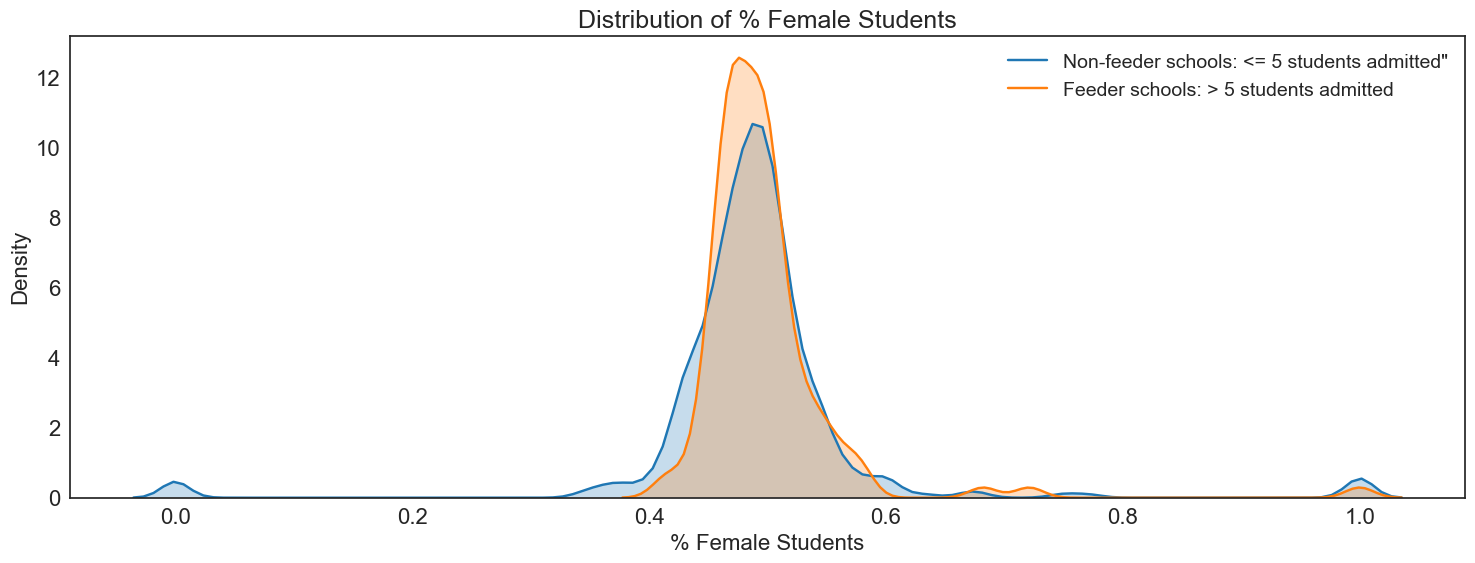

In [94]:
plt.figure(figsize=(18,6))

sns.set_style('white')

sns.kdeplot(diversity_tbl.loc[(diversity_tbl.feeder_school <= 5),'% Female']
            ,label='Non-feeder schools: <= 5 students admitted"' ,shade=True,)

sns.kdeplot(diversity_tbl.loc[(diversity_tbl.feeder_school >5 ),'% Female']
            ,label='Feeder schools: > 5 students admitted' ,shade=True, )

plt.title('Distribution of % Female Students', fontsize=18)
plt.xlabel('% Female Students', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(fontsize=14)

In [95]:
diversity_tbl['%_black_hispanic'] = diversity_tbl['% Black'] + diversity_tbl['% Hispanic']

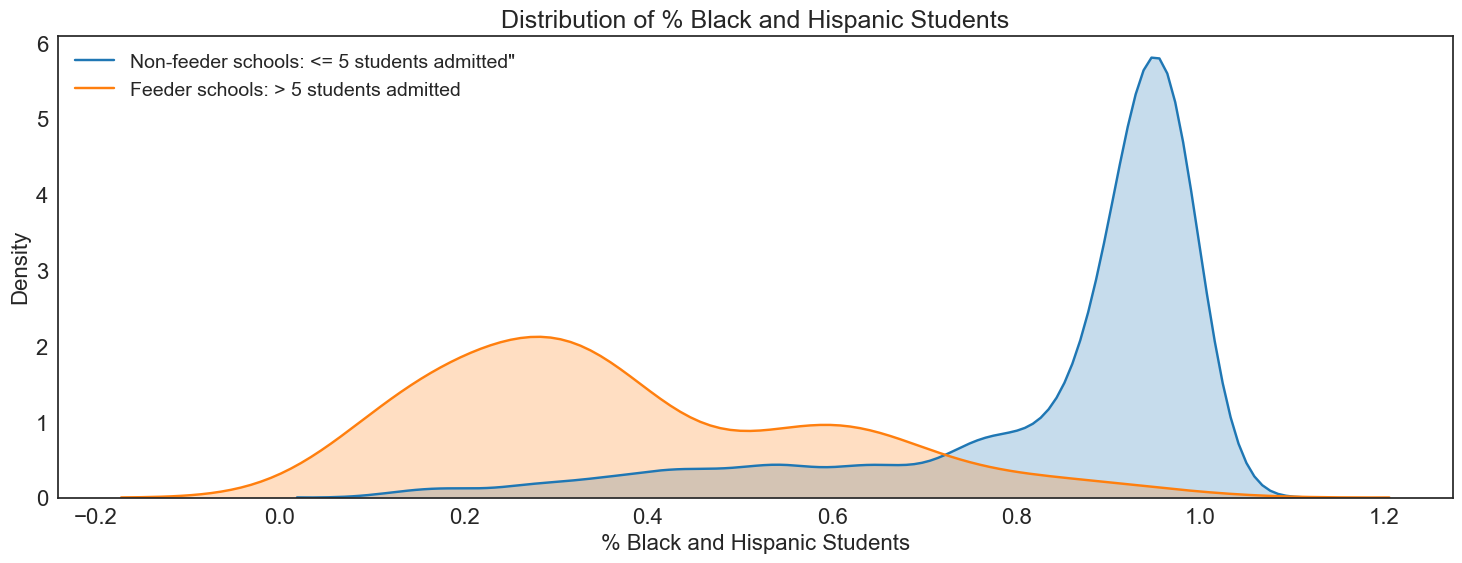

In [96]:
plt.figure(figsize=(18,6))

sns.set_style('white')

sns.kdeplot(diversity_tbl.loc[(diversity_tbl.feeder_school <= 5),'%_black_hispanic']
            ,label='Non-feeder schools: <= 5 students admitted"' ,shade=True,)

sns.kdeplot(diversity_tbl.loc[(diversity_tbl.feeder_school >5 ),'%_black_hispanic']
            ,label='Feeder schools: > 5 students admitted' ,shade=True, )

plt.title('Distribution of % Black and Hispanic Students', fontsize=18)
plt.xlabel('% Black and Hispanic Students', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(fontsize=14)

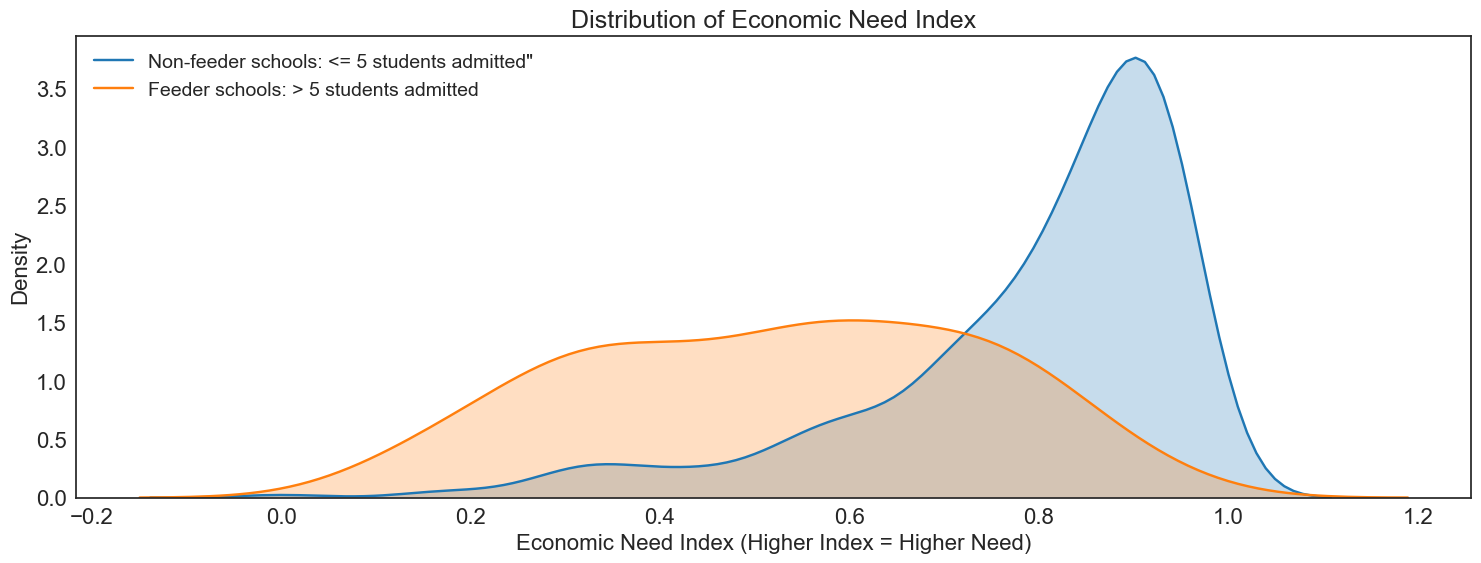

In [97]:
plt.figure(figsize=(18,6))

sns.set_style('white')

sns.kdeplot(diversity_tbl.loc[(diversity_tbl.feeder_school <= 5),'Economic Need Index']
            ,label='Non-feeder schools: <= 5 students admitted"' ,shade=True, )

sns.kdeplot(diversity_tbl.loc[(diversity_tbl.feeder_school >5 ),'Economic Need Index']
            ,label='Feeder schools: > 5 students admitted' ,shade=True)

plt.title('Distribution of Economic Need Index', fontsize=18)
plt.xlabel('Economic Need Index (Higher Index = Higher Need)', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(fontsize=14)

* Figure 1 shows that the gender ratio of feeder schools and non-feeder schools display __similar distribution centered at ~50%.__ Similarity in gender ratio across schools make it difficult to study the middle school impact using school-level data alone.
<br>
<br>
* Figure 2 and Figure 3 show that __feeder schools and non-feeder schools are strikingly different in terms of their racial composition and economic need level.
<br>
<br>
* The following section, the last two metrics will be use to calculate a scaled score to measure how likely students from a given middle school will be underrepresented at SPHS. 

# 3. Underrepresentation Score

In [98]:
diversity_tbl['diversity_score'] = diversity_tbl['Economic Need Index'] * diversity_tbl['%_black_hispanic']

diversity_tbl = diversity_tbl.dropna(subset = ['diversity_score'])

diversity_tbl['diversity_score'] = np.sqrt(diversity_tbl['Economic Need Index']**2 + diversity_tbl['%_black_hispanic']**2)

diversity_tbl['diversity_score'] = (diversity_tbl['diversity_score'] - np.min(diversity_tbl['diversity_score']))/(np.max(diversity_tbl['diversity_score']) - np.min(diversity_tbl['diversity_score']))

diversity_tbl["Count of Offers"] = diversity_tbl["Count of Offers"].fillna(0)

diversity_tbl["Count of Offers"] = diversity_tbl["Count of Offers"].astype(int)

In [99]:
trace0 = go.Scatter(
    x = diversity_tbl.loc[(diversity_tbl.feeder_school <= 5),"%_black_hispanic"],
    y = diversity_tbl.loc[(diversity_tbl.feeder_school <= 5),'Economic Need Index'],
    name = 'Non-feeder schools: <= 5 students admitted',
    text = diversity_tbl["School Name"],
    mode = 'markers',
    marker = dict(
        size = diversity_tbl["Count of Offers"]/5,
        line = dict(width = 1)
        )
    )


trace1 = go.Scatter(
    x = diversity_tbl.loc[(diversity_tbl.feeder_school > 5),"%_black_hispanic"],
    y = diversity_tbl.loc[(diversity_tbl.feeder_school > 5),'Economic Need Index'],
    name = 'Feeder schools: > 5 students admitted',
    text = diversity_tbl["School Name"],
    mode = 'markers',
    marker = dict(
        size = diversity_tbl["Count of Offers"]/5,
        line = dict(width = 1)
        )
    )




data = [trace0, trace1]

layout= go.Layout(
    title= '% Black and Hispanic Students vs Economic Need Index',
    xaxis= dict(
        title= '%_black_hispanic'
    ),
    yaxis=dict(
        title='Economic Need Index'
    ),
    legend=dict(
        x=.3,
        y=-.5,
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=12,
            color='#000'
        ),
        bgcolor='#E2E2E2',
        bordercolor='#FFFFFF',
        borderwidth=2
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

In [100]:
diversity_tbl['Economic Need Index'].corr(diversity_tbl['%_black_hispanic'])

0.7712767837811961

* The scatterplot above visualizes the positive correlation (r = 0.77, p < 0.01) between Economic Need Index and % Black and Hispanic students. 
<br>
<br>
* Feeder schools with more students admitted to SPHS (<font color="#FFA500">__larger-sized orange points__</font>) tend to have low-to-medium economic need and lower proportion of Black or Hispanic students, while a noticeable number of non-feeder schools (<font color="#0000FF">__blue points__</font>) cluster around the upper right corner of the plot. In other words, students from these non-feeder schools are mostly low-income Hispanic or Black student that are underrepresented at SPHS.
<br>
<br>
* To better evaluate the need of students at different schools and help PASSNYC prioritize its outreach effort, __I will create a simple index score, the Underrepresentation Score, will be assigned to each middle school to quantify how likely students at a given school are underperforming during SPHS application process__ As the origin in the plot represents middle school without Hispanic, Black and low-income student. 
<br>
<br>
> <font size = "3">__Underrepresentation Score = Scaled Euclidean distance between a given point and the origin__</br>
<br>
<br>
* Underrepresentation Score closer to 1 indicates high level of underrepresentation at SPHS. Please see Table 1 in the appendix for the full list of middle schools with their corresponding Underrepresentation Scores. 


In [101]:
diversity_tbl_all = diversity_tbl.copy()

diversity_tbl['top_deciles'] = np.where(diversity_tbl.diversity_score >= 
                                        diversity_tbl.diversity_score.quantile(.75),
                                        1, 2)

diversity_tbl_all['top_deciles'] = np.where(diversity_tbl_all.diversity_score >= 
                                        diversity_tbl_all.diversity_score.quantile(.75),
                                        1, 2)

diversity_tbl = diversity_tbl.loc[diversity_tbl['top_deciles'] == 1]

cols = ["DBN", "district", "School Name", "%_black_hispanic", 
              "Economic Need Index", "diversity_score", "top_deciles", 'feeder_school']

diversity_tbl = diversity_tbl[cols]

diversity_tbl_all = diversity_tbl_all[cols]

diversity_tbl = diversity_tbl.sort_values('diversity_score', ascending=False)

diversity_tbl = diversity_tbl.reset_index(drop=True)

diversity_tbl.head()

,DBN,district,School Name,%_black_hispanic,Economic Need Index,diversity_score,top_deciles,feeder_school
0,23K284,23.0,"The Gregory Jocko Jackson School of Sports, Ar...",0.989,0.968,1.000000,1,0
1,10X342,10.0,International School for Liberal Arts,0.996,0.958,0.998408,1,0
2,09X219,9.0,I.S. 219 New Venture School,0.983,0.966,0.995336,1,0
3,10X390,10.0,M.S. 390,0.993,0.950,0.992088,1,0
4,07X584,7.0,I.S. 584,0.993,0.949,0.991521,1,0


In [102]:
district_demo['perc_black_hispanic'] = district_demo['PERCENT BLACK NON HISPANIC'] + district_demo['PERCENT HISPANIC LATINO']

district_demo['district'] = district_demo.index.values

district_demo = pd.merge(district_demo,
                         diversity_tbl.groupby('district', as_index=False).agg({'DBN':'nunique', 'diversity_score':'mean'}),
                         how='left', on='district')

district_demo = pd.merge(district_demo,
                         diversity_tbl_all.groupby('district', as_index=False).agg({'DBN':'nunique'}),
                         how='left', on='district')

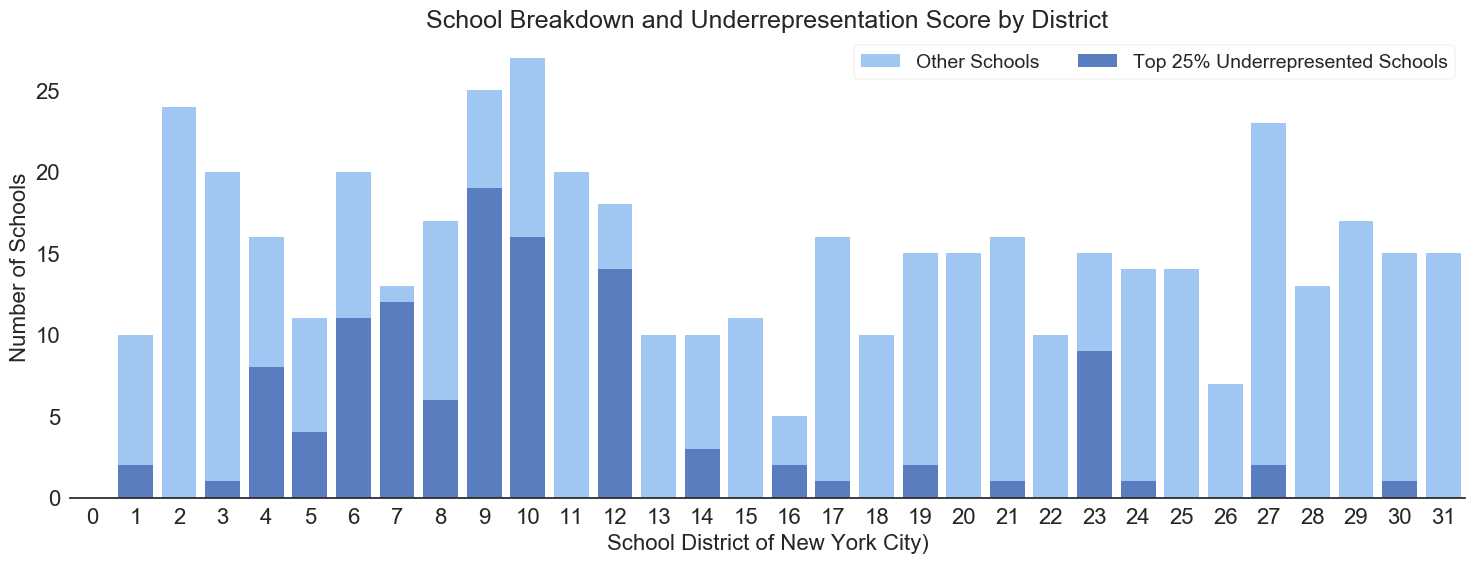

In [103]:
f, ax = plt.subplots(figsize=(18, 6))

sns.set_style('white')

sns.set_color_codes("pastel")

sns.barplot(x = 'district', y = 'DBN_y', data = district_demo, 
            label='Other Schools',
            color='b')

sns.set_color_codes("muted")

sns.barplot(x = 'district', y = 'DBN_x', data = district_demo, 
            label='Top 25% Underrepresented Schools',
            color='b')

plt.title('School Breakdown and Underrepresentation Score by District', fontsize=18)
plt.xlabel('School District of New York City)', fontsize=16)
plt.ylabel('Number of Schools', fontsize=16)
plt.tick_params(labelsize=16)
ax.legend(ncol=2, loc="upper right", frameon=True, fontsize=14)
sns.despine(left=True, top=True)

* Top 25% schools with the highest Underrepresentation Scores represent 20 out of 31 school districts in New York City, and districts with higher index scores tend to have higher proportion of underrepresented middle schools.

# 4. Which public middle schools are more likely to have students qualified for SPHS?

* The SPHS of New York City have a long history of supporting the educational needs of students with strong academic or artistic performance. Eight out of nine SPHS admit students based on a single entrance exam, SHSAT. As the sore means of admission to the city's most prestigious high schools, SHSAT tests for students' abilities in English and Math. 
<br>
<br>
* __Assuming that students from middle schools with stronger academic performance are more likely to be motivated to apply and be admitted to SPHS, this section will focus on academic performance, and aims to answer one question through k-means clustering: which non-feeder schools have education quality and academic performance similar to those of feeder schools?__


## 4.1 K-Means Clusters

In [104]:
school_explorer.iloc[:,[3, 22, 23, 24, 26, 28, 30, 32, 34]].head()

,Location Code,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
0,01M015,0.94,0.18,0.89,0.94,0.86,0.91,0.85,0.94
1,01M019,0.92,0.30,0.96,0.96,0.97,0.90,0.86,0.94
2,01M020,0.94,0.20,0.87,0.77,0.82,0.61,0.80,0.79
3,01M034,0.92,0.28,0.85,0.78,0.82,0.73,0.89,0.88
4,01M063,0.93,0.23,0.90,0.88,0.87,0.81,0.89,0.93


In [105]:
math['Mean Scale Score'] = math['Mean Scale Score'].replace('s', np.nan)
math['Mean Scale Score'] = math['Mean Scale Score'].astype(float)

ela['Mean Scale Score'] = ela['Mean Scale Score'].replace('s', np.nan)
ela['Mean Scale Score'] = ela['Mean Scale Score'].astype(float)


for col in math.columns:
    
    if '%' in col:
        
        math[col] = math[col].replace('s', np.nan)
        math[col] = math[col].astype(float)
        
        
for col in ela.columns:
    
    if '%' in col:
        
        ela[col] = ela[col].replace('s', np.nan)
        ela[col] = ela[col].astype(float)
        

        
math_filter = math[math['Grade']=='8']
math_filter = math_filter.groupby(['DBN', 'School Name'], as_index=False).agg({'Mean Scale Score': 'mean',
                                                              'Level1_%': 'mean',
                                                              'Level2_%': 'mean',
                                                              'Level3_%': 'mean',
                                                              'Level4_%': 'mean'})

ela_filter = ela[ela['Grade']=='8']
ela_filter = ela_filter.groupby(['DBN', 'School Name'], as_index=False).agg({'Mean Scale Score': 'mean',
                                                              'Level1_%': 'mean',
                                                              'Level2_%': 'mean',
                                                              'Level3_%': 'mean',
                                                              'Level4_%': 'mean'})


school_explorer_filter = school_explorer[['Location Code', 'School Name', 'Rigorous Instruction %', 'Collaborative Teachers %',
                                        'Supportive Environment %', 'Effective School Leadership %',
                                        'Strong Family-Community Ties %', 'Trust %', 'Student Attendance Rate',
                                        'Percent of Students Chronically Absent']]

class_size_filter = class_size[['DBN', 'Average Class Size']]

In [106]:
cluster_df = (ela_filter.merge(math_filter, how='inner', on='DBN').
              merge(class_size_filter, how='inner', on='DBN').
              merge(ptr, how='inner', on='DBN').
              merge(school_explorer_filter, how='right', left_on='DBN', right_on='Location Code')
              )

cluster_df = cluster_df.drop_duplicates(subset='DBN', keep="last")

In [107]:
cluster_df_ind = cluster_df.set_index('DBN')
numerical_columnsnumeric  = cluster_df_ind.describe().columns
cluster_df_ind = cluster_df_ind[numerical_columnsnumeric]
cluster_df_ind = cluster_df_ind.fillna(0)

In [108]:
scaler = MinMaxScaler()

#cluster_df_ind = cluster_df_ind.drop_duplicates()
scaler.fit(cluster_df_ind)
cluster_df_ind_scale = scaler.transform(cluster_df_ind)

Text(0.5,1,'Elbow curve')

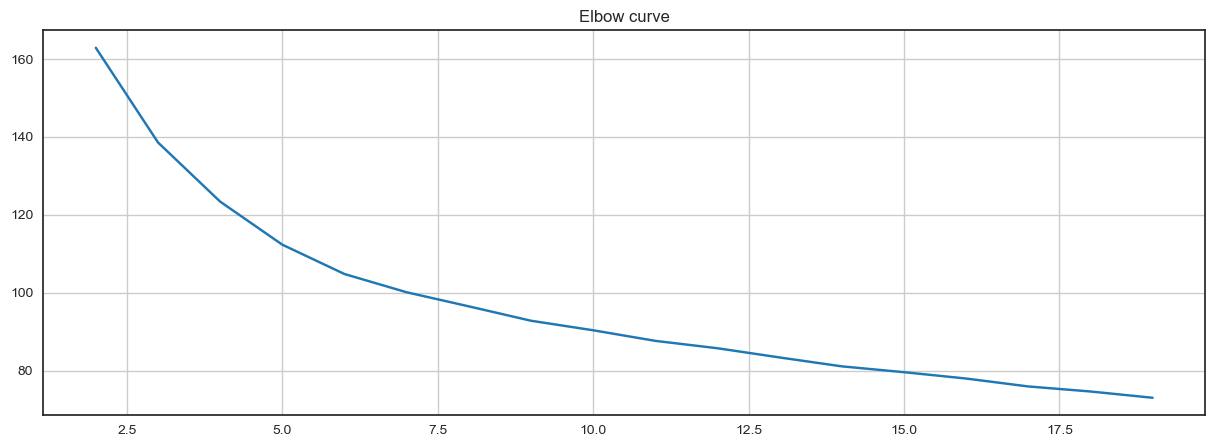

In [109]:
X = cluster_df_ind_scale
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [110]:
def makeKmean(k):
    global clusterer, preds, centers, sample_preds
    
    # Apply your clustering algorithm of choice
    clusterer = KMeans(n_clusters=k, random_state=10, max_iter=10, n_init=25)
    clusterer.fit(cluster_df_ind_scale)
    
    # Predict the cluster for each data point
    preds = clusterer.predict(cluster_df_ind_scale)

    # Find the cluster centers
    centers = clusterer.cluster_centers_

In [111]:
makeKmean(3)

In [112]:
preds_to = pd.DataFrame(preds)

cluster_df_ind = cluster_df_ind.reset_index()

cluster_df_ind_find = pd.concat([cluster_df_ind, preds_to], axis=1, sort=False)

cluster_df_ind_find_nm = cluster_df_ind_find.rename(index =str ,columns={0:'cluster'})

cluster_df_drop_dp = pd.DataFrame(cluster_df_ind_find_nm).drop_duplicates()

cluster_df_final = cluster_df_ind_find_nm.merge(school_explorer_filter,
                                                how='inner', left_on='DBN',
                                                right_on='Location Code')

cluster_df_final = cluster_df_final.drop_duplicates()

In [113]:
cluster_df_final['DBN'].nunique()

479

In [114]:
cluster_df_rnk = cluster_df_final.groupby(["cluster"], as_index=False).agg({
    'Mean Scale Score_x':'mean',
    'Mean Scale Score_y':'mean'})

cluster_df_rnk = cluster_df_rnk.round(0)

cluster_df_rnk['cluster_name'] = np.where(cluster_df_rnk['Mean Scale Score_x'] == max(cluster_df_rnk['Mean Scale Score_x']), 
                                 "A", np.where(cluster_df_rnk['Mean Scale Score_x'] == min(cluster_df_rnk['Mean Scale Score_x']), 
                                                      "C", "B")) 

cluster_df_final_mrg = cluster_df_final.merge(cluster_df_rnk, how='inner', on='cluster')


cluster_df_final_mrg_grp = cluster_df_final_mrg.groupby(["cluster_name", "School Name"], as_index=False).agg({
    'Mean Scale Score_x_x':'mean',
    'Mean Scale Score_y_x':'mean'})


In [115]:
cluster_df_rnk

,cluster,Mean Scale Score_x,Mean Scale Score_y,cluster_name
0,0,296.0,288.0,B
1,1,287.0,275.0,C
2,2,318.0,317.0,A


In [116]:
trace0 = go.Scatter(
    x = cluster_df_final_mrg_grp.loc[(cluster_df_final_mrg_grp.cluster_name=='A'), 'Mean Scale Score_x_x'],
    y = cluster_df_final_mrg_grp.loc[(cluster_df_final_mrg_grp.cluster_name=='A'), 'Mean Scale Score_y_x'],
    name = 'cluster A',
    text = cluster_df_final_mrg_grp["School Name"],
    mode = 'markers',
    marker = dict(
        line = dict(width = 1)
        )
    )

trace1 = go.Scatter(
    x = cluster_df_final_mrg_grp.loc[(cluster_df_final_mrg_grp.cluster_name=='B'), 'Mean Scale Score_x_x'],
    y = cluster_df_final_mrg_grp.loc[(cluster_df_final_mrg_grp.cluster_name=='B'), 'Mean Scale Score_y_x'],
    name = 'cluster B',
    text = cluster_df_final_mrg_grp["School Name"],
    mode = 'markers',
    marker = dict(
        line = dict(width = 1)
        )
    )

trace2 = go.Scatter(
    x = cluster_df_final_mrg_grp.loc[(cluster_df_final_mrg_grp.cluster_name=='C'), 'Mean Scale Score_x_x'],
    y = cluster_df_final_mrg_grp.loc[(cluster_df_final_mrg_grp.cluster_name=='C'), 'Mean Scale Score_y_x'],
    name = 'cluster C',
    text = cluster_df_final_mrg_grp["School Name"],
    mode = 'markers',
    marker = dict(
        line = dict(width = 1)
        )
    )



data = [trace0, trace1, trace2]

layout= go.Layout(
    title= 'K-means Clusters',
    xaxis= dict(
        title= 'Average ELA Score (Grade 8)'
    ),
    yaxis=dict(
        title='Average Math Score (Grade 8)'
    ),
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

In [117]:
sum_table = cluster_df_final_mrg.merge(diversity_tbl_all, how='left', on='DBN')

tbl_to_show = (sum_table.groupby(['cluster_name'], as_index=False).agg({'School Name_y':'nunique',
                                                          'Mean Scale Score_x_x': 'mean',
                                                          'Mean Scale Score_y_x': 'mean',
                                                          'Student Attendance Rate_x': 'mean',
                                                          'Average Class Size': 'mean',
                                                          'diversity_score': 'mean',
                                                          'feeder_school': 'sum'}).
                                                           rename(columns={'School Name_y': 'Number Of Schools',
                                                                           'Mean Scale Score_x_x': 'Avg Math',
                                                                           'Mean Scale Score_y_x': 'Avg Ela',
                                                                           'Student Attendance Rate_x' :'Avg Student Attendance Rate',
                                                                           'diversity_score': 'Diversity Score',
                                                                           'feeder_school': 'Feeder Schools (# of Students)'}))

tbl_to_show

,cluster_name,Number Of Schools,Avg Math,Avg Ela,Avg Student Attendance Rate,Average Class Size,Diversity Score,Feeder Schools (# of Students)
0,A,145,318.493493,317.074087,0.958014,17.702740,0.464932,3541.0
1,B,174,296.481714,287.828762,0.930514,14.145143,0.802949,268.0
2,C,153,287.089346,275.259599,0.907278,12.141772,0.885162,64.0



### _Cluster A_: Most likely to have students qualified for SPHS
### _Cluster B_: Somewhat likely to have students qualified for SPHS
### _Cluster C_: Least likely to have students qualified for SPHS

## 4.2 hierarchical clustering

In [118]:
connectivity = kneighbors_graph(cluster_df_ind_scale, n_neighbors=10, include_self=False)

def makeWard(k):
    global ward, label
    
    # Apply your clustering algorithm of choice 
    ward = AgglomerativeClustering(n_clusters=k, linkage='ward', connectivity=connectivity).fit(cluster_df_ind_scale)
    
    # Predict the cluster for each data point
    label = ward.labels_

In [119]:
makeWard(3)

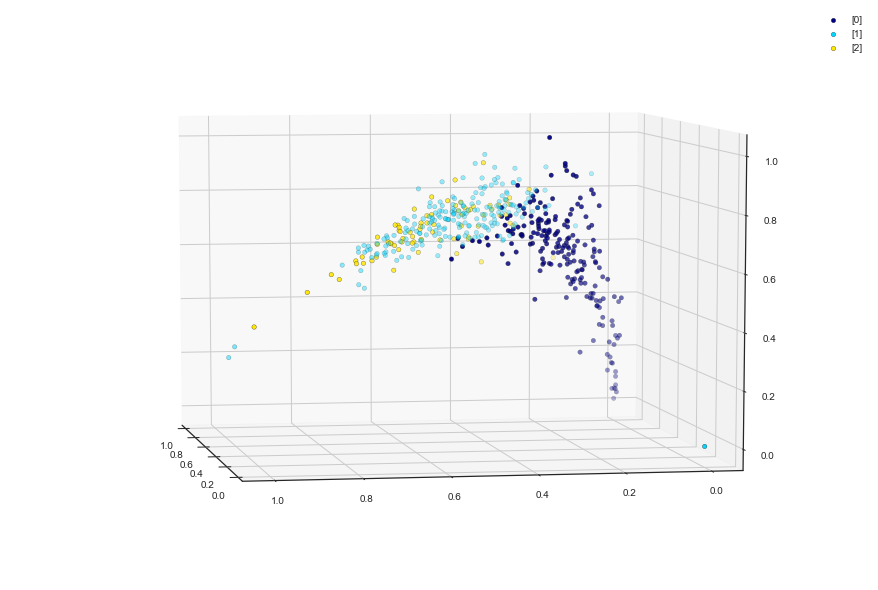

In [122]:
fig = plt.figure(figsize=(12, 8))
ax = p3.Axes3D(fig)
ax.view_init(7, 170 )

for l in np.unique(label):
    ax.scatter(cluster_df_ind_scale[label == l, 0],
               cluster_df_ind_scale[label == l, 1],
               cluster_df_ind_scale[label == l, 2],
               color=plt.cm.jet(np.float(l) / np.max(label + 1)),
               label=[l],
               s=20, edgecolor='k')

ax.legend()

In [123]:
cluster_df_ind.head()

,DBN,Mean Scale Score_x,Level1_%_x,Level2_%_x,Level3_%_x,Level4_%_x,Mean Scale Score_y,Level1_%_y,Level2_%_y,Level3_%_y,...,Average Class Size,School Pupil-Teacher Ratio,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %,Student Attendance Rate,Percent of Students Chronically Absent
0,01M034,298.40,24.860,44.08,27.00,4.04,294.40,34.66,44.22,16.540,...,17.3,9.2,0.85,0.78,0.82,0.73,0.89,0.88,0.92,0.28
1,01M140,293.40,31.400,45.30,19.84,3.46,281.20,54.60,35.50,8.180,...,11.0,12.1,0.94,0.91,0.85,0.87,0.83,0.93,0.93,0.27
2,01M184,333.20,3.460,17.96,41.08,37.52,349.40,4.22,11.82,28.260,...,26.8,13.9,0.90,0.81,0.91,0.67,0.83,0.85,0.98,0.02
3,01M188,288.20,35.980,46.68,16.32,1.06,294.20,30.40,51.66,14.000,...,23.1,10.7,1.00,1.00,0.99,0.99,0.92,0.99,0.91,0.37
4,01M292,266.75,65.875,27.95,6.20,0.00,253.25,79.05,16.55,4.375,...,13.0,8.2,0.72,0.77,0.77,0.72,0.76,0.87,0.84,0.58


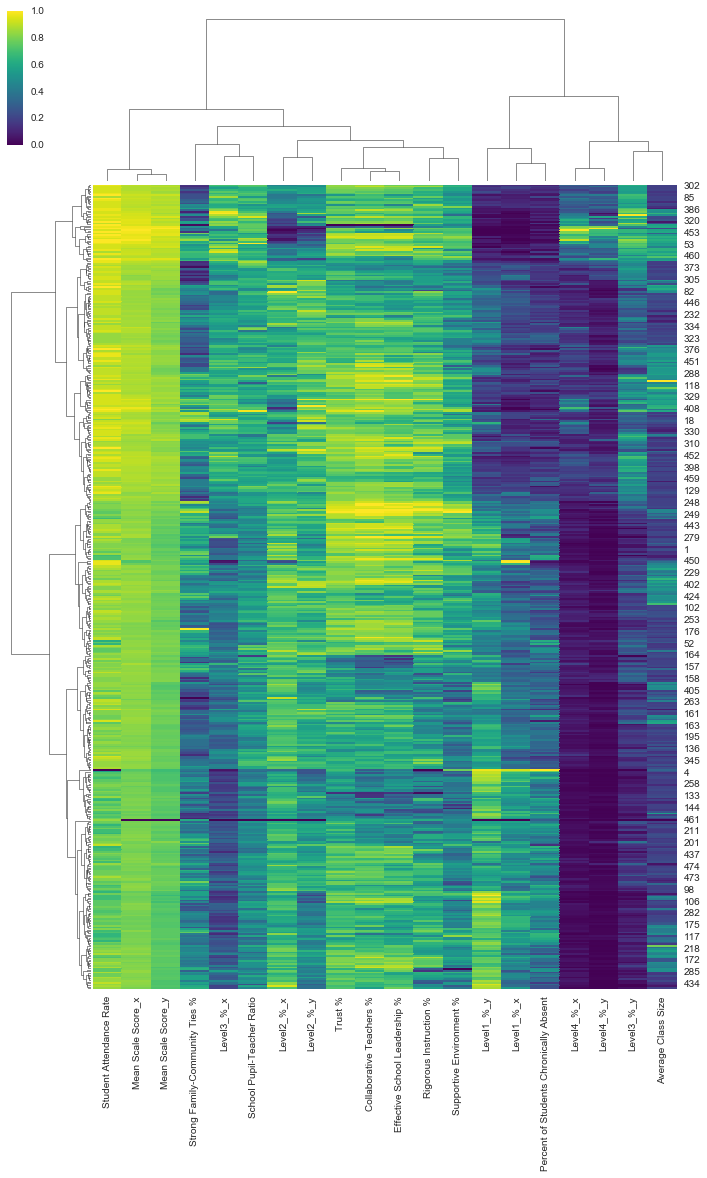

In [124]:
from scipy.cluster.hierarchy import dendrogram, linkage

sns.clustermap(pd.DataFrame(cluster_df_ind_scale, columns = cluster_df_ind.drop(['DBN'], axis=1).keys()), figsize=(12,18), method='ward', cmap='viridis')


plt.show()

# 5. Recommendations to PASSNYC

* Cluster A and B, indicating high level of education quality and academic potential. Students from these middle schools are more like to be qualified for and therefore be motivated to apply for SPHS, and should take higher priority in PASSNYC’s outreach effort.

## 5.1 Recommend Schools from Cluster A

In [125]:
df1_to_show = sum_table[(sum_table['cluster_name'] == 'A') &
             (sum_table['top_deciles'] == np.float(1))][['DBN', 
                                                      'district',
                                                      'School Name_y',
                                                      'diversity_score',
                                                      'Mean Scale Score_x_x',
                                                      'Mean Scale Score_y_x']]

df1_to_show.sort_values(['diversity_score'], ascending=False)

,DBN,district,School Name_y,diversity_score,Mean Scale Score_x_x,Mean Scale Score_y_x
213,07X223,7.0,The Laboratory School of Finance and Technolog...,0.969807,302.2,311.4
218,09X327,9.0,Comprehensive Model School Project M.S. 327,0.954134,303.6,322.6
217,09X128,9.0,Mott Hall III,0.944602,308.0,310.4
269,24Q311,24.0,Corona Arts & Sciences Academy,0.941496,308.0,299.5
222,10X015,10.0,P.S. X015 Institute for Environmental Learning,0.941252,309.8,310.0


* Cluster A represents middle schools that are most likely to have students qualified for SPHS. 
<br>
<br>
* Of all middle schools in the top quantile of the Underrepresentation Score, 5 schools are listed above are assigned to Cluster A, but none of them have more than 5 students accepted by SPHS in 2018. Students from these schools are likely to benefit the most from services provided by PASSNYC and its partners, and these schools should take the highest priority in PASSNYC’s plan.
<br>
<br>
* Same idea for Cluster B below 

## 5.2 Recommend Schools from Cluster B

In [126]:
df2_to_show = sum_table[(sum_table['cluster_name'] == 'B') &
             (sum_table['top_deciles'] == np.float(1))][['DBN', 
                                                      'district',
                                                      'School Name_y',
                                                      'diversity_score',
                                                      'Mean Scale Score_x_x',
                                                      'Mean Scale Score_y_x']]

df2_to_show.sort_values(['diversity_score'], ascending=False)

,DBN,district,School Name_y,diversity_score,Mean Scale Score_x_x,Mean Scale Score_y_x
52,10X342,10.0,International School for Liberal Arts,0.998408,277.6,282.60
30,06M349,6.0,Harbor Heights,0.982772,256.8,282.20
170,32K291,32.0,J.H.S. 291 Roland Hayes,0.979649,278.0,272.20
172,32K349,32.0,"I.S. 349 Math, Science & Tech.",0.977780,287.0,284.40
45,10X206,10.0,I.S. 206 Ann Mersereau,0.975609,278.0,281.00
70,12X212,12.0,P.S. 212,0.974174,279.8,282.00
51,10X315,10.0,P.S. 315 Lab School,0.974068,298.2,298.60
33,07X343,7.0,Academy of Applied Mathematics and Technology,0.972861,292.6,290.60
54,10X447,10.0,Creston Academy,0.972128,289.8,296.40
2,01M188,1.0,P.S. 188 The Island School,0.970924,288.2,294.20
